In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import json
import re

In [2]:
user=[]
path = '/Users/bjxl/yelp_dataset/yelp_academic_dataset_user.json'

with open(path, encoding='utf-8') as fin:
    i = 0
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)

user=pd.DataFrame(user)
user.to_csv('/Users/bjxl/fyp/csv/user.csv')

In [4]:
user["user_id"].count()

1987897

In [5]:
user[user["review_count"]>2000]["user_id"].count()

306

In [138]:
user_more_than_2000=user[user["review_count"]>2000]
user_more_than_2000.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')

In [139]:
user_more_than_2000

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
32,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,63,46,47,21,518,773,867,867,310,231
55,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,108,85,79,40,350,742,1070,1070,403,258
74,VHdY6oG2JPVNjihWhOooAQ,Jessica,2101,2005-07-21 01:16:04,47831,28830,44899,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","YTqvt6PKmQS-Ygk_JeyXZQ, NhAJ4Fv4xDkWJYo85Y3yOQ...",2627,...,404,393,963,153,2124,16674,7324,7324,2313,548
82,om5ZiponkpRqUNa3pVPiRg,Andrea,2811,2006-01-18 02:35:04,18545,9225,13824,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","bQiST5YdWLSH_yk56ccApA, r7Zi52GqnJa6Tb0dqTKlkw...",1002,...,136,88,214,102,1370,2284,1639,1639,437,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392220,WALNtcSZlONK4Yj-o3pzKA,Dan,2257,2007-12-19 03:26:11,10177,8454,8282,"2016,2017,2018,2019,20,20,2021","mZDq-nTY0XxYaK8OT2J8kQ, REXJPb6FtFe9zepHwxCiTw...",642,...,122,32,21,11,1188,1981,1771,1771,391,596
1626248,FdPioXvctMq8lhBtd_NnTg,Lilly,2173,2015-08-15 23:01:37,45204,29298,42310,"2016,2017,2018,2019,20,20,2021","swmrfBnaqU0nyJ3pFBfNgQ, ylidjKyb_BAQakGCRl4wrA...",190,...,78,177,12,32,1176,2138,2652,2652,1169,1530
1789161,VgtcRwMPiAEeuPsayXB4kA,Max,2204,2006-12-03 07:18:08,852,449,547,"2008,2009","-ASVMBruwZHaE5sIfobKzA, lVMtIuEoM1Y4xSkDYLylAQ...",31,...,6,3,2,0,15,33,77,77,10,0
1790999,Ggx8iUdJ7lsQSqXRuclXtg,Nadine,3499,2010-10-18 17:58:12,110553,77755,108733,"2014,2015,2016,2017,2018,2019,20,20,2021","GU5igpfhQTilmOBHWri6KA, N-xwL53xHQA82O5NPkng5Q...",850,...,579,472,406,54,5112,11488,20835,20835,4547,16333


In [140]:
friends_306=[]
for friends in user_more_than_2000["friends"]:
    friend_in_2000=[]
    friends=re.split(", ",friends)
    for i in range(0,len(friends)):
        for user_id in user_more_than_2000["user_id"]:
            if friends[i]==user_id:
                 friend_in_2000.append(friends[i])
    friends_306.append(friend_in_2000)
                
#         if friends[i] in user_more_than_500["user_id"]:
#             friend_in_500.append(friends[i])
friends_306

[['E_GAXhVA1_lVC2aFpMQElA',
  'd67zTET_2IuVoWcUU0aWaQ',
  '2l0O1EI1m0yWjFo2zSt71w',
  'eSlOI3GhroEtcbaD_nFXJQ',
  'dHxvSPU6PZqX1LQRXajGDQ',
  '_pBzBgtCTN9PNUPfgPDI8A',
  'ZIOCmdFaMIF56FR-nWr_2A',
  'om5ZiponkpRqUNa3pVPiRg',
  '3XzhO2aJdvVtYhKOCJsPrg',
  'gjhzKWsqCIrpEd9pevbKZw',
  'oyXIV-9GRBBZrFydPCaR2w',
  'I-FmdvI28N7OIIt4JZOgIg',
  'pou3BbKsIozfH50rxmnMew',
  'wZPizeBxMAyOSl0M0zuCjg',
  '0G-bcpdR48tfZy6koGUiTQ',
  'qWYEuBZP7av55tewg3PXKg',
  'qjfMBIZpQT9DDtw_BWCopQ',
  'VHdY6oG2JPVNjihWhOooAQ',
  'AbMjnKOwg736fcIu8apuyQ',
  'O3nhfuz6W4wlmIQgM_Oo2g',
  'mIo2cFs_89a7i0DWHT9F-w',
  'wXdbkFZsfDR7utJvbWElyA',
  'PcvbBOCOcs6_suRDH7TSTg',
  'h7p-GuaHFGsiKCF4g6Bjqg',
  'cVrM2BvOvPV0Vi_rC8kepQ',
  'adKonsQWY64vJYglPotH5Q',
  '0G-QF457q_0Z_jKqh6xWiA',
  'Tk6WbRgdwWGh_yRczYNJIw',
  'ET8n-r7glWYqZhuR6GcdNw',
  'GaWT2KIjIxfIBMgGIm7HGw',
  'EiT_pSuIb08oRn4CfwfMJg',
  'YttDgOC9AlM4HcAlDsbB2A',
  '0zDHiDbj79uBOy3OAcE25A',
  'FdPioXvctMq8lhBtd_NnTg',
  'Zl1fJNTzNULZiqBRShxUYA',
  'PlkcpVx74F5bcjTzn

In [141]:
user_more_than_2000["friends_2000"]=friends_306

/var/folders/cv/j22vlhb52tb_nhwbf2m_cdq40000gn/T/ipykernel_3006/3276667326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_more_than_2000["friends_2000"]=friends_306


In [142]:
user_more_than_2000
user_more_than_2000.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')

In [143]:
user_friend=user_more_than_2000[["user_id","friends_2000"]]
user_friend.to_csv('/Users/bjxl/fyp/csv/user_friends_2000.csv')

In [2]:
user_friend=pd.read_csv('/Users/bjxl/fyp/csv/user_friends_2000.csv')

In [4]:
user_friend=user_friend.drop(columns=["Unnamed: 0"])
user_friend.to_csv('/Users/bjxl/fyp/csv/user_friends_2000.csv')

In [3]:
user_friend

,Unnamed: 0,user_id,friends_2000
0,0,j14WgRoU_-2ZE1aw1dXrJg,"['E_GAXhVA1_lVC2aFpMQElA', 'd67zTET_2IuVoWcUU0..."
1,1,NIhcRW6DWvk1JQhDhXwgOQ,"['rcU7ysY41qGppbw4pQgjqg', 'M9puGD3VU5FuhE60Hk..."
2,2,2l0O1EI1m0yWjFo2zSt71w,"['d67zTET_2IuVoWcUU0aWaQ', 'ZpUI9ze0YlA6nMSHwx..."
3,3,VHdY6oG2JPVNjihWhOooAQ,"['B7ecAeAIrXg7sgmabS38pg', 'Pf7FI0OukC_CEcCz0Z..."
4,4,om5ZiponkpRqUNa3pVPiRg,"['dIIKEfOgo0KqUfGQvGikPg', '2l0O1EI1m0yWjFo2zS..."
...,...,...,...
301,301,WALNtcSZlONK4Yj-o3pzKA,"['eSlOI3GhroEtcbaD_nFXJQ', 'Z88N6qly3Dp5C06XbZ..."
302,302,FdPioXvctMq8lhBtd_NnTg,"['lvthTfCQGD0qaEk6jCdRdQ', 'zvQ7B3KZuFOX7pYLsO..."
303,303,VgtcRwMPiAEeuPsayXB4kA,"['M1cMsRL4L7IUr9RILDywEQ', 'B7ecAeAIrXg7sgmabS..."
304,304,Ggx8iUdJ7lsQSqXRuclXtg,"['1wE7oHKgNOLPM0QWS3jm9w', 'Dfu-NuG1YWB96jjBLI..."


In [2]:
user_more_than_2000=pd.read_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')
user_more_than_2000=user_more_than_2000.drop(columns=["Unnamed: 0"])
user_more_than_2000.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')
user_more_than_2000

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friends_2000,friends_index,group
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,251,1847,7054,3131,3131,1521,1946,"['E_GAXhVA1_lVC2aFpMQElA', 'd67zTET_2IuVoWcUU0...","[2, 199, 4, 117, 12, 34, 44, 126, 3, 52, 169, ...",0
1,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,21,518,773,867,867,310,231,"['rcU7ysY41qGppbw4pQgjqg', 'M9puGD3VU5FuhE60Hk...","[19, 15, 138, 126, 154]",1
2,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,40,350,742,1070,1070,403,258,"['d67zTET_2IuVoWcUU0aWaQ', 'ZpUI9ze0YlA6nMSHwx...","[122, 261, 188, 266, 3, 46, 52, 29, 79, 205, 1...",0
3,VHdY6oG2JPVNjihWhOooAQ,Jessica,2101,2005-07-21 01:16:04,47831,28830,44899,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","YTqvt6PKmQS-Ygk_JeyXZQ, NhAJ4Fv4xDkWJYo85Y3yOQ...",2627,...,153,2124,16674,7324,7324,2313,548,"['B7ecAeAIrXg7sgmabS38pg', 'Pf7FI0OukC_CEcCz0Z...","[261, 44, 205, 79, 112, 185, 188, 217, 195, 77...",0
4,om5ZiponkpRqUNa3pVPiRg,Andrea,2811,2006-01-18 02:35:04,18545,9225,13824,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","bQiST5YdWLSH_yk56ccApA, r7Zi52GqnJa6Tb0dqTKlkw...",1002,...,102,1370,2284,1639,1639,437,189,"['dIIKEfOgo0KqUfGQvGikPg', '2l0O1EI1m0yWjFo2zS...","[185, 2, 83, 44, 3, 34, 60, 80, 194, 88, 46, 1...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,WALNtcSZlONK4Yj-o3pzKA,Dan,2257,2007-12-19 03:26:11,10177,8454,8282,"2016,2017,2018,2019,20,20,2021","mZDq-nTY0XxYaK8OT2J8kQ, REXJPb6FtFe9zepHwxCiTw...",642,...,11,1188,1981,1771,1771,391,596,"['eSlOI3GhroEtcbaD_nFXJQ', 'Z88N6qly3Dp5C06XbZ...","[278, 77, 217, 122, 239, 76, 277, 138, 209, 13...",301
302,FdPioXvctMq8lhBtd_NnTg,Lilly,2173,2015-08-15 23:01:37,45204,29298,42310,"2016,2017,2018,2019,20,20,2021","swmrfBnaqU0nyJ3pFBfNgQ, ylidjKyb_BAQakGCRl4wrA...",190,...,32,1176,2138,2652,2652,1169,1530,"['lvthTfCQGD0qaEk6jCdRdQ', 'zvQ7B3KZuFOX7pYLsO...","[250, 76, 304, 248, 254, 35, 287, 125, 18, 33,...",302
303,VgtcRwMPiAEeuPsayXB4kA,Max,2204,2006-12-03 07:18:08,852,449,547,"2008,2009","-ASVMBruwZHaE5sIfobKzA, lVMtIuEoM1Y4xSkDYLylAQ...",31,...,0,15,33,77,77,10,0,"['M1cMsRL4L7IUr9RILDywEQ', 'B7ecAeAIrXg7sgmabS...","[200, 261, 260, 239]",159
304,Ggx8iUdJ7lsQSqXRuclXtg,Nadine,3499,2010-10-18 17:58:12,110553,77755,108733,"2014,2015,2016,2017,2018,2019,20,20,2021","GU5igpfhQTilmOBHWri6KA, N-xwL53xHQA82O5NPkng5Q...",850,...,54,5112,11488,20835,20835,4547,16333,"['1wE7oHKgNOLPM0QWS3jm9w', 'Dfu-NuG1YWB96jjBLI...","[108, 138, 76, 130, 254, 160, 250, 122, 139, 231]",30


In [8]:
user_more_than_2000["review_count"].min()

2002

In [172]:
dic=user_more_than_2000["average_stars"].to_dict()
dic1=user_more_than_2000["name"].to_dict()
dic2=user_more_than_2000["review_count"].to_dict()
dic
nodes=[]
for i in dic:
    nodes.append({'id': i,'average_stars': dic[i],'name': dic1[i],"review_count":dic2[i]})
nodes
# dic1={}
# dic1['index']=nodes.tolist()
dicJson = json.dumps(nodes)
dicJson


'[{"id": 0, "average_stars": 3.74, "name": "Daniel", "review_count": 4333}, {"id": 1, "average_stars": 3.69, "name": "Lia", "review_count": 2288}, {"id": 2, "average_stars": 3.92, "name": "Shiho", "review_count": 2837}, {"id": 3, "average_stars": 4.22, "name": "Jessica", "review_count": 2101}, {"id": 4, "average_stars": 3.97, "name": "Andrea", "review_count": 2811}, {"id": 5, "average_stars": 3.95, "name": "Farrah", "review_count": 2073}, {"id": 6, "average_stars": 4.1, "name": "Joi", "review_count": 2009}, {"id": 7, "average_stars": 4.01, "name": "Peter", "review_count": 3193}, {"id": 8, "average_stars": 3.81, "name": "Kim", "review_count": 9941}, {"id": 9, "average_stars": 3.57, "name": "Danan", "review_count": 2108}, {"id": 10, "average_stars": 3.39, "name": "Dani", "review_count": 2934}, {"id": 11, "average_stars": 4.32, "name": "Stephen", "review_count": 3246}, {"id": 12, "average_stars": 3.84, "name": "Miriam", "review_count": 3199}, {"id": 13, "average_stars": 3.71, "name": "Ed"

In [153]:
friends_index=[]
for i in user_more_than_2000["friends_2000"]:
    friend_index=[]
    i=re.compile('[^A-Z^a-z^0-9^ ]').sub('', i)
    i=re.split(" ", i)
    for j in i:
        n=0
        for user_id in user_more_than_2000["user_id"]:
            if j==user_id:
                friend_index.append(n)
            n=n+1    
    friends_index.append(friend_index)  

In [154]:
user_more_than_2000["friends_index"]=friends_index
user_more_than_2000

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friends_2000,friends_index
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,"['E_GAXhVA1_lVC2aFpMQElA', 'd67zTET_2IuVoWcUU0...","[2, 199, 4, 117, 12, 34, 44, 126, 3, 52, 169, ..."
1,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,47,21,518,773,867,867,310,231,"['rcU7ysY41qGppbw4pQgjqg', 'M9puGD3VU5FuhE60Hk...","[19, 15, 138, 126, 154]"
2,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,79,40,350,742,1070,1070,403,258,"['d67zTET_2IuVoWcUU0aWaQ', 'ZpUI9ze0YlA6nMSHwx...","[122, 261, 188, 266, 3, 46, 52, 29, 79, 205, 1..."
3,VHdY6oG2JPVNjihWhOooAQ,Jessica,2101,2005-07-21 01:16:04,47831,28830,44899,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","YTqvt6PKmQS-Ygk_JeyXZQ, NhAJ4Fv4xDkWJYo85Y3yOQ...",2627,...,963,153,2124,16674,7324,7324,2313,548,"['B7ecAeAIrXg7sgmabS38pg', 'Pf7FI0OukC_CEcCz0Z...","[261, 44, 205, 79, 112, 185, 188, 217, 195, 77..."
4,om5ZiponkpRqUNa3pVPiRg,Andrea,2811,2006-01-18 02:35:04,18545,9225,13824,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","bQiST5YdWLSH_yk56ccApA, r7Zi52GqnJa6Tb0dqTKlkw...",1002,...,214,102,1370,2284,1639,1639,437,189,"['dIIKEfOgo0KqUfGQvGikPg', '2l0O1EI1m0yWjFo2zS...","[185, 2, 83, 44, 3, 34, 60, 80, 194, 88, 46, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,WALNtcSZlONK4Yj-o3pzKA,Dan,2257,2007-12-19 03:26:11,10177,8454,8282,"2016,2017,2018,2019,20,20,2021","mZDq-nTY0XxYaK8OT2J8kQ, REXJPb6FtFe9zepHwxCiTw...",642,...,21,11,1188,1981,1771,1771,391,596,"['eSlOI3GhroEtcbaD_nFXJQ', 'Z88N6qly3Dp5C06XbZ...","[278, 77, 217, 122, 239, 76, 277, 138, 209, 13..."
302,FdPioXvctMq8lhBtd_NnTg,Lilly,2173,2015-08-15 23:01:37,45204,29298,42310,"2016,2017,2018,2019,20,20,2021","swmrfBnaqU0nyJ3pFBfNgQ, ylidjKyb_BAQakGCRl4wrA...",190,...,12,32,1176,2138,2652,2652,1169,1530,"['lvthTfCQGD0qaEk6jCdRdQ', 'zvQ7B3KZuFOX7pYLsO...","[250, 76, 304, 248, 254, 35, 287, 125, 18, 33,..."
303,VgtcRwMPiAEeuPsayXB4kA,Max,2204,2006-12-03 07:18:08,852,449,547,"2008,2009","-ASVMBruwZHaE5sIfobKzA, lVMtIuEoM1Y4xSkDYLylAQ...",31,...,2,0,15,33,77,77,10,0,"['M1cMsRL4L7IUr9RILDywEQ', 'B7ecAeAIrXg7sgmabS...","[200, 261, 260, 239]"
304,Ggx8iUdJ7lsQSqXRuclXtg,Nadine,3499,2010-10-18 17:58:12,110553,77755,108733,"2014,2015,2016,2017,2018,2019,20,20,2021","GU5igpfhQTilmOBHWri6KA, N-xwL53xHQA82O5NPkng5Q...",850,...,406,54,5112,11488,20835,20835,4547,16333,"['1wE7oHKgNOLPM0QWS3jm9w', 'Dfu-NuG1YWB96jjBLI...","[108, 138, 76, 130, 254, 160, 250, 122, 139, 231]"


In [155]:
user_more_than_2000.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')

In [157]:
group=[]
for i in user_more_than_2000["user_id"]:
    group.append(-1)
group
user_more_than_2000["group"]=group

In [158]:
user_more_than_2000

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friends_2000,friends_index,group
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,251,1847,7054,3131,3131,1521,1946,"['E_GAXhVA1_lVC2aFpMQElA', 'd67zTET_2IuVoWcUU0...","[2, 199, 4, 117, 12, 34, 44, 126, 3, 52, 169, ...",-1
1,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,21,518,773,867,867,310,231,"['rcU7ysY41qGppbw4pQgjqg', 'M9puGD3VU5FuhE60Hk...","[19, 15, 138, 126, 154]",-1
2,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,40,350,742,1070,1070,403,258,"['d67zTET_2IuVoWcUU0aWaQ', 'ZpUI9ze0YlA6nMSHwx...","[122, 261, 188, 266, 3, 46, 52, 29, 79, 205, 1...",-1
3,VHdY6oG2JPVNjihWhOooAQ,Jessica,2101,2005-07-21 01:16:04,47831,28830,44899,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","YTqvt6PKmQS-Ygk_JeyXZQ, NhAJ4Fv4xDkWJYo85Y3yOQ...",2627,...,153,2124,16674,7324,7324,2313,548,"['B7ecAeAIrXg7sgmabS38pg', 'Pf7FI0OukC_CEcCz0Z...","[261, 44, 205, 79, 112, 185, 188, 217, 195, 77...",-1
4,om5ZiponkpRqUNa3pVPiRg,Andrea,2811,2006-01-18 02:35:04,18545,9225,13824,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","bQiST5YdWLSH_yk56ccApA, r7Zi52GqnJa6Tb0dqTKlkw...",1002,...,102,1370,2284,1639,1639,437,189,"['dIIKEfOgo0KqUfGQvGikPg', '2l0O1EI1m0yWjFo2zS...","[185, 2, 83, 44, 3, 34, 60, 80, 194, 88, 46, 1...",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,WALNtcSZlONK4Yj-o3pzKA,Dan,2257,2007-12-19 03:26:11,10177,8454,8282,"2016,2017,2018,2019,20,20,2021","mZDq-nTY0XxYaK8OT2J8kQ, REXJPb6FtFe9zepHwxCiTw...",642,...,11,1188,1981,1771,1771,391,596,"['eSlOI3GhroEtcbaD_nFXJQ', 'Z88N6qly3Dp5C06XbZ...","[278, 77, 217, 122, 239, 76, 277, 138, 209, 13...",-1
302,FdPioXvctMq8lhBtd_NnTg,Lilly,2173,2015-08-15 23:01:37,45204,29298,42310,"2016,2017,2018,2019,20,20,2021","swmrfBnaqU0nyJ3pFBfNgQ, ylidjKyb_BAQakGCRl4wrA...",190,...,32,1176,2138,2652,2652,1169,1530,"['lvthTfCQGD0qaEk6jCdRdQ', 'zvQ7B3KZuFOX7pYLsO...","[250, 76, 304, 248, 254, 35, 287, 125, 18, 33,...",-1
303,VgtcRwMPiAEeuPsayXB4kA,Max,2204,2006-12-03 07:18:08,852,449,547,"2008,2009","-ASVMBruwZHaE5sIfobKzA, lVMtIuEoM1Y4xSkDYLylAQ...",31,...,0,15,33,77,77,10,0,"['M1cMsRL4L7IUr9RILDywEQ', 'B7ecAeAIrXg7sgmabS...","[200, 261, 260, 239]",-1
304,Ggx8iUdJ7lsQSqXRuclXtg,Nadine,3499,2010-10-18 17:58:12,110553,77755,108733,"2014,2015,2016,2017,2018,2019,20,20,2021","GU5igpfhQTilmOBHWri6KA, N-xwL53xHQA82O5NPkng5Q...",850,...,54,5112,11488,20835,20835,4547,16333,"['1wE7oHKgNOLPM0QWS3jm9w', 'Dfu-NuG1YWB96jjBLI...","[108, 138, 76, 130, 254, 160, 250, 122, 139, 231]",-1


In [159]:
k=0
for i in user_more_than_2000["friends_index"]:
    for j in i:
        if user_more_than_2000["group"][j]==-1:
            user_more_than_2000["group"][j]=k
    if user_more_than_2000["group"][k]==-1:
        user_more_than_2000["group"][k]=k
    k=k+1

/var/folders/cv/j22vlhb52tb_nhwbf2m_cdq40000gn/T/ipykernel_3006/4022031546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_more_than_2000["group"][j]=k
/var/folders/cv/j22vlhb52tb_nhwbf2m_cdq40000gn/T/ipykernel_3006/4022031546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_more_than_2000["group"][k]=k


In [161]:
user_more_than_2000.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_2000.csv')

In [162]:
user_more_than_2000["group"]

0        0
1        1
2        0
3        0
4        0
      ... 
301    301
302    302
303    159
304     30
305      7
Name: group, Length: 306, dtype: int64

In [168]:
user_friends=user_more_than_2000[["user_id","friends_2000"]]
user_friends.to_csv("/Users/bjxl/fyp/csv/user_friends_2000.csv")

In [169]:
user_friend=pd.read_csv("/Users/bjxl/fyp/csv/user_friends_2000.csv")
user_friend

,Unnamed: 0,user_id,friends_2000
0,0,j14WgRoU_-2ZE1aw1dXrJg,"['E_GAXhVA1_lVC2aFpMQElA', 'd67zTET_2IuVoWcUU0..."
1,1,NIhcRW6DWvk1JQhDhXwgOQ,"['rcU7ysY41qGppbw4pQgjqg', 'M9puGD3VU5FuhE60Hk..."
2,2,2l0O1EI1m0yWjFo2zSt71w,"['d67zTET_2IuVoWcUU0aWaQ', 'ZpUI9ze0YlA6nMSHwx..."
3,3,VHdY6oG2JPVNjihWhOooAQ,"['B7ecAeAIrXg7sgmabS38pg', 'Pf7FI0OukC_CEcCz0Z..."
4,4,om5ZiponkpRqUNa3pVPiRg,"['dIIKEfOgo0KqUfGQvGikPg', '2l0O1EI1m0yWjFo2zS..."
...,...,...,...
301,301,WALNtcSZlONK4Yj-o3pzKA,"['eSlOI3GhroEtcbaD_nFXJQ', 'Z88N6qly3Dp5C06XbZ..."
302,302,FdPioXvctMq8lhBtd_NnTg,"['lvthTfCQGD0qaEk6jCdRdQ', 'zvQ7B3KZuFOX7pYLsO..."
303,303,VgtcRwMPiAEeuPsayXB4kA,"['M1cMsRL4L7IUr9RILDywEQ', 'B7ecAeAIrXg7sgmabS..."
304,304,Ggx8iUdJ7lsQSqXRuclXtg,"['1wE7oHKgNOLPM0QWS3jm9w', 'Dfu-NuG1YWB96jjBLI..."


In [170]:
dic=user_friend["friends_2000"].to_dict()

# dic[0]
nodes=[]
for i in dic:
    dic[i]=re.compile('[^A-Z^a-z^0-9^ ]').sub('', dic[i])
    dic[i]=re.split(" ", dic[i])
    for j in dic[i]:
        m=0
        for k in user_friend["user_id"]:
            if k==j:
                nodes.append({"source": user_friend["Unnamed: 0"][i],"target": user_friend["Unnamed: 0"][m]})
            m=m+1

In [171]:
nodes=str(nodes)
nodes

"[{'source': 0, 'target': 2}, {'source': 0, 'target': 199}, {'source': 0, 'target': 4}, {'source': 0, 'target': 117}, {'source': 0, 'target': 12}, {'source': 0, 'target': 34}, {'source': 0, 'target': 44}, {'source': 0, 'target': 126}, {'source': 0, 'target': 3}, {'source': 0, 'target': 52}, {'source': 0, 'target': 169}, {'source': 0, 'target': 151}, {'source': 0, 'target': 254}, {'source': 0, 'target': 46}, {'source': 0, 'target': 160}, {'source': 0, 'target': 70}, {'source': 0, 'target': 258}, {'source': 0, 'target': 194}, {'source': 0, 'target': 250}, {'source': 0, 'target': 295}, {'source': 0, 'target': 138}, {'source': 0, 'target': 292}, {'source': 1, 'target': 19}, {'source': 1, 'target': 15}, {'source': 1, 'target': 138}, {'source': 1, 'target': 126}, {'source': 1, 'target': 154}, {'source': 2, 'target': 122}, {'source': 2, 'target': 261}, {'source': 2, 'target': 188}, {'source': 2, 'target': 266}, {'source': 2, 'target': 3}, {'source': 2, 'target': 46}, {'source': 2, 'target': 5

In [103]:
user_more_than_1000.shape

(1949, 25)

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


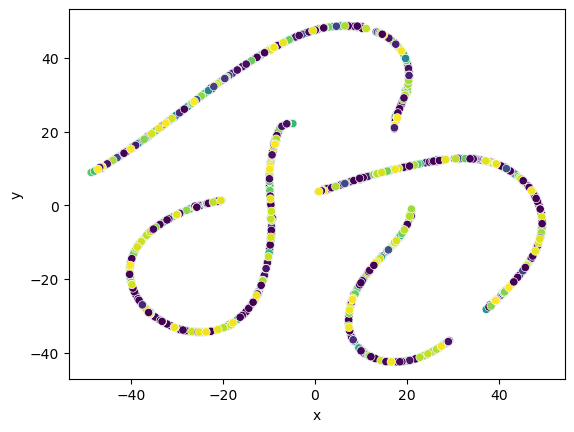

In [122]:
numeric=["funny","average_stars"]
df_numeric=user_more_than_1000[numeric]
df_numeric.shape
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(df_numeric)
tsne_features[1:4,:]
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df
label=user_more_than_1000["group"]
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df,c=label)
plt.show()

In [116]:
non_numeric=["user_id","name","yelping_since","elite","friends","fans","friends_1000","friends_index"]
df_numeric=user_more_than_1000.drop(non_numeric,axis=1)

In [117]:
df_numeric.shape

(1949, 17)

In [118]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(df_numeric)
tsne_features[1:4,:]

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[25.478527, 19.354496],
       [25.040262, 23.158709],
       [41.594887, 10.981043]], dtype=float32)

In [119]:
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df

,x,y
0,14.038065,43.311176
1,25.478527,19.354496
2,25.040262,23.158709
3,41.594887,10.981043
4,26.040133,12.515135
...,...,...
1944,10.417916,42.252110
1945,35.194061,-13.054263
1946,-10.498867,-30.065800
1947,15.172565,-25.635019


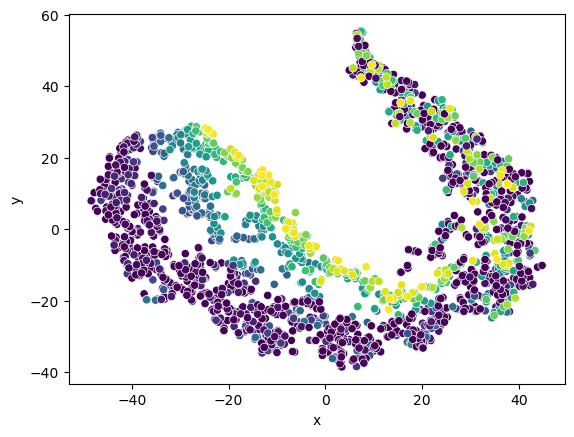

In [120]:
import seaborn as sns
label=user_more_than_1000["group"]
sns.scatterplot(x="x",y="y",data=df,c=label)
plt.show()

In [110]:
user_tSNE=user_more_than_1000[["useful","funny","cool"]]

In [111]:
user_tSNE.shape

(1949, 3)

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


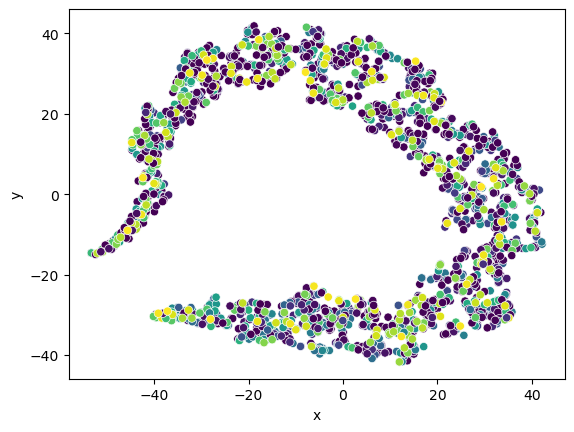

In [112]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(user_tSNE)
tsne_features[1:4,:]
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df
label=user_more_than_1000["group"]
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df,c=label)

plt.show()